In [1]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package')

# Download Multiple .nc Files

In [2]:
# Download Files to relative folder  
from hypso import download_nc_files
            
download_nc_files(filename_list=["tibet_2022-09-29_0446Z.nc", "xaafuun_2023-09-11_0623Z-l1a.nc","vancouver_2023-05-25_1831Z-l1a.nc"],
                  download_dir="/home/cameron/Nedlastinger/")

Download Failed. <urlopen error [Errno -3] Temporary failure in name resolution>
Deleting tibet_2022-09-29_0446Z.nc
Download Failed. <urlopen error [Errno -3] Temporary failure in name resolution>
Deleting xaafuun_2023-09-11_0623Z-l1a.nc
Download Failed. <urlopen error [Errno -3] Temporary failure in name resolution>
Deleting vancouver_2023-05-25_1831Z-l1a.nc


# Read .nc File

In [3]:
# Import Satellite Object
from hypso import Hypso1
import os

# Define HYPSO Image File and the .points from QGIS (if available)
dir_path = '/home/cameron/Dokumenter/Data/erie'
nc_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-l1a.nc')
points_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-bin3.points')

# Create Satellite Object
satobj = Hypso1(hypso_path=nc_file, points_path=points_file, verbose=True)

[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running georeferencing...
No image mode provided. Detected image mode: bin3


# Get L1A datacube

In [4]:
l1a_cube = satobj.get_l1a_cube()

# Generate L1B datacube

In [5]:
satobj.generate_l1b_cube()

l1b_cube = satobj.get_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


# Generate L2A datacube

In [6]:
satobj.generate_l2a_cube(product='6sv1')

l2a_cube = satobj.get_l2a_cube(product='6sv1')

[INFO] Running 6SV1 atmospheric correction
[INFO] Calibration has already been run. Skipping.
[INFO] Running geometry computation...
ECI position samples: 1631
Quaternion samples: 1631
ADCS time range: 1658330880.000000 to 1658331778.250000
Frame time range: 1658331554.791878 to 1658331598.200969
173 sample(s) inside frame time range
Interpolating 956 frames
Spatial dimensions: 956 frames/lines, 684 pixels/samples
Computing pixel latitude and longitude coordinates...
Interpolating pixel coordinate gaps...
Using geometry-computed latitude and longitude values
Computing local angles (sun and satellite azimuth and zenith angles)...
Image Center (lat,lon): (41.82761	-83.08504)
Image Center elevation angle: 63.52887
Image Center off-nadir angle: 32.72877

-------  Py6S Atmospheric Correction  ----------
ROI:
Max Lat: 43.12644389364998  Min Lat: 40.36988390355103
Max Lon: -82.67700617437025  Min Lon: -84.15470201879344


100%|██████████| 120/120 [00:47<00:00,  2.53it/s]


# Get TOA Reflectance from TOA Radiance (L2A)

In [9]:
satobj.generate_toa_reflectance()

toa_rrs = satobj.get_toa_reflectance()

[INFO] Calibration has already been run. Skipping.
[INFO] Geometry computation has already been run. Skipping.
[ERROR] Top of atmosphere (TOA) reflectance has not yet been generated.


# Compare L1A and L1B .nc files

In [4]:
from hypso.utils import compare_netcdf_files
hypso_path_l1a="/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1a.nc"

# L1B is Generated when loading l1a.nc for the first time
hypso_path_l1b = "/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z-l1b.nc" 

summary_l1a_l1b = compare_netcdf_files(hypso_path_l1a, hypso_path_l1b)
summary_l1a_l1b.head(10)

,label,presence,validator,mjosa_2023-06-15_0948Z-l1a.nc,mjosa_2023-06-15_0948Z-l1b.nc
0,"(/, dimensions, lines)",Present in Both,equal,598,598
1,"(/, dimensions, samples)",Present in Both,equal,1092,1092
2,"(/, dimensions, bands)",Present in Both,equal,120,120
3,"(/, dimensions, adcssamples)",Present in Both,equal,1912,1912
4,"(/, dimensions, radrows)",Present in Both,different,1216,1092
5,"(/, dimensions, radcols)",Present in Both,different,1936,120
6,"(/, dimensions, specrows)",Present in Both,different,4,120
7,"(/, group_attributes, instrument)",Present in Both,equal,HYPSO-1 Hyperspectral Imager,HYPSO-1 Hyperspectral Imager
8,"(/, group_attributes, institution)",Present in Both,equal,Norwegian University of Science and Technology,Norwegian University of Science and Technology
9,"(/, group_attributes, resolution)",Present in Both,equal,N/A,N/A


# Get Radiance from L1C Product

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (59.5, 10) -→ (1991, 77)


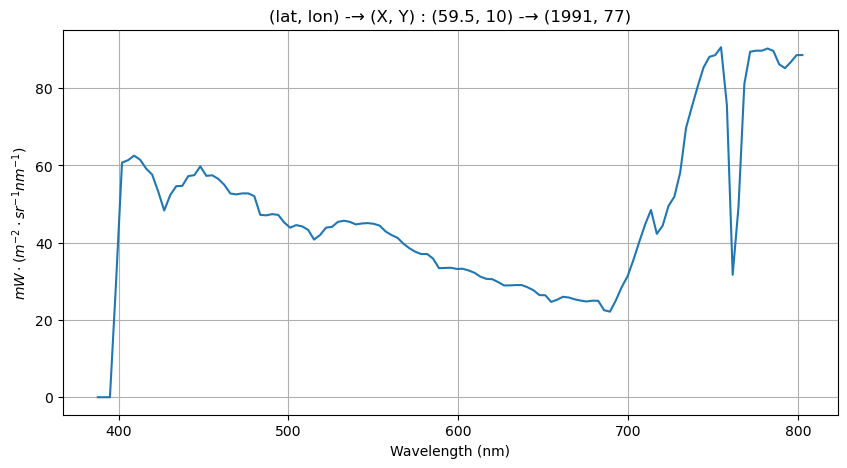

,wl,radiance,lat,lon,X,Y
0,387.847497,0.000000,59.5,10,1991,77
1,391.404066,0.000000,59.5,10,1991,77
2,394.959416,0.000000,59.5,10,1991,77
3,398.513546,29.374838,59.5,10,1991,77
4,402.066457,60.709898,59.5,10,1991,77


In [6]:
spectra_l1c = satobj.get_spectra(product="L1C", position_dict={"lat":59.5,"lon":10}, plot=True)

spectra_l1c.head()

## Estimate Water Mask



-------  Naive-Bayes Water Mask Detector  ----------
Loading configuration file /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetection/WaterDetect.ini
File /Users/alvaroflores/Documents/Research Assitant/hypso-package/hypso/classification/WaterDetection/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=17228.61357350908
k=3 :Calinski_harabaz index=10970.303577577712
k=4 :Calinski_harabaz index=7483.976114437732
k=5 :Calinski_harabaz index=14987.564972778157
k=6 :Calinski_harabaz index=13759.059952710535
k=7 :Calinski_harabaz index=25424.78389063756
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 5
Skipping cluster_id 5


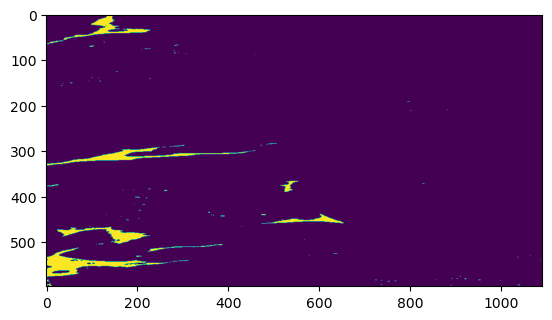

In [15]:
from hypso.classification import ndwi_watermask

# Calculate Water Mask With Binary Values
ndwi_watermask(satobj)

# Show Water Mask
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(satobj.waterMask)
plt.show()

## Print Contents of .nc file

In [8]:
from hypso.utils import print_nc

# Print Attributes and Groups of .nc file generated
print_nc(nc_file=nc_file)

--- GROUP: "/" ---
DIMENSIONS: lines (956), samples (684), bands (120), adcssamples (1631), radrows (1216), radcols (1936), specrows (4), 
GROUP ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, target_coords, radiometric_file, spectral_file, md5sum, byte_size_compressed_cube, warnings, 
VARIABLES: 
VAR ATTRIBUTES: 
SUB-GROUPS: logfiles, products, metadata, 

  --- GROUP: "/logfiles" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: 
  VAR ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: Lt (lines, samples, bands), 
  VAR ATTRIBUTES: 

  SUB-GROUPS: 

  --- GROUP: "/metadata" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: 
  VAR ATTRIBUTES: 
  SUB-GROUPS: capture_config, timing, temperature, adcs, corrections, database, 

    --- GROUP: "/metadata/capture_config" ---
    DIMENSIONS: 
    GROUP A